In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.20MB/s]


In [ ]:
#folder is unzipped, may take a few moments to populate

with zipfile.ZipFile('/content/heart-failure-clinical-data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
#Importing Dataset
try :
  df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
except :
  df = pd.read_csv('heart.csv')

# EDA (Exploratory Data Analysis)

In [ ]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

Terdapat 299 medical record dari pasien dengan gagal jantung dengan 13 fitur. DEATH_EVENT merupakan variabel dependent

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

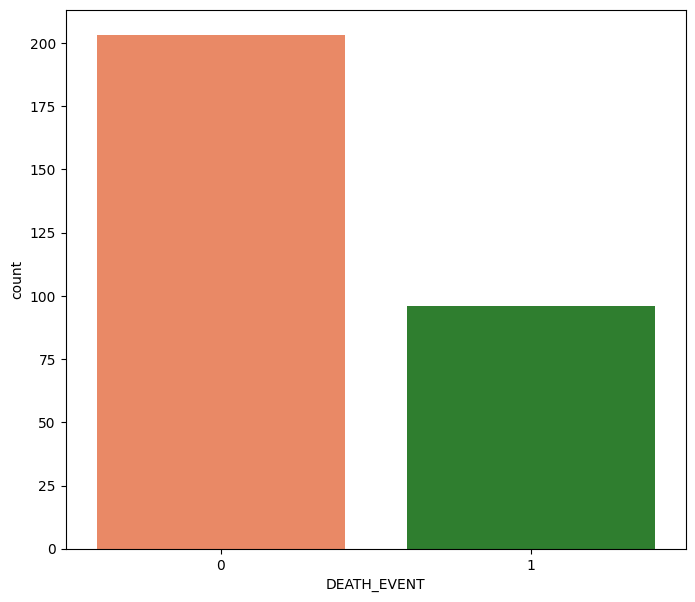

In [ ]:
plt.figure(figsize=(8,7))
cols= ["coral","forestgreen"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

**Menunjukan bahwa Data imbalance**

<ipython-input-14-f590dae539f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['platelets'])


<Axes: xlabel='platelets', ylabel='Density'>

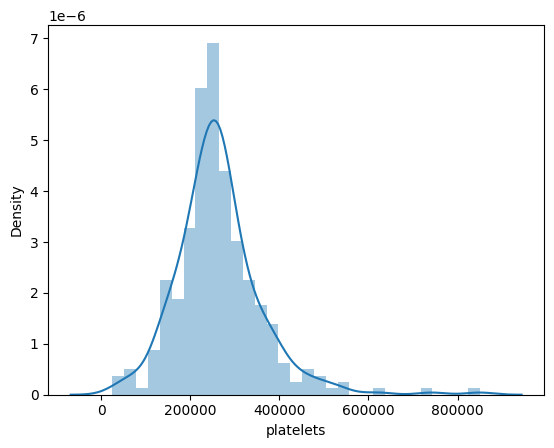

In [ ]:
sns.distplot(df['platelets'])

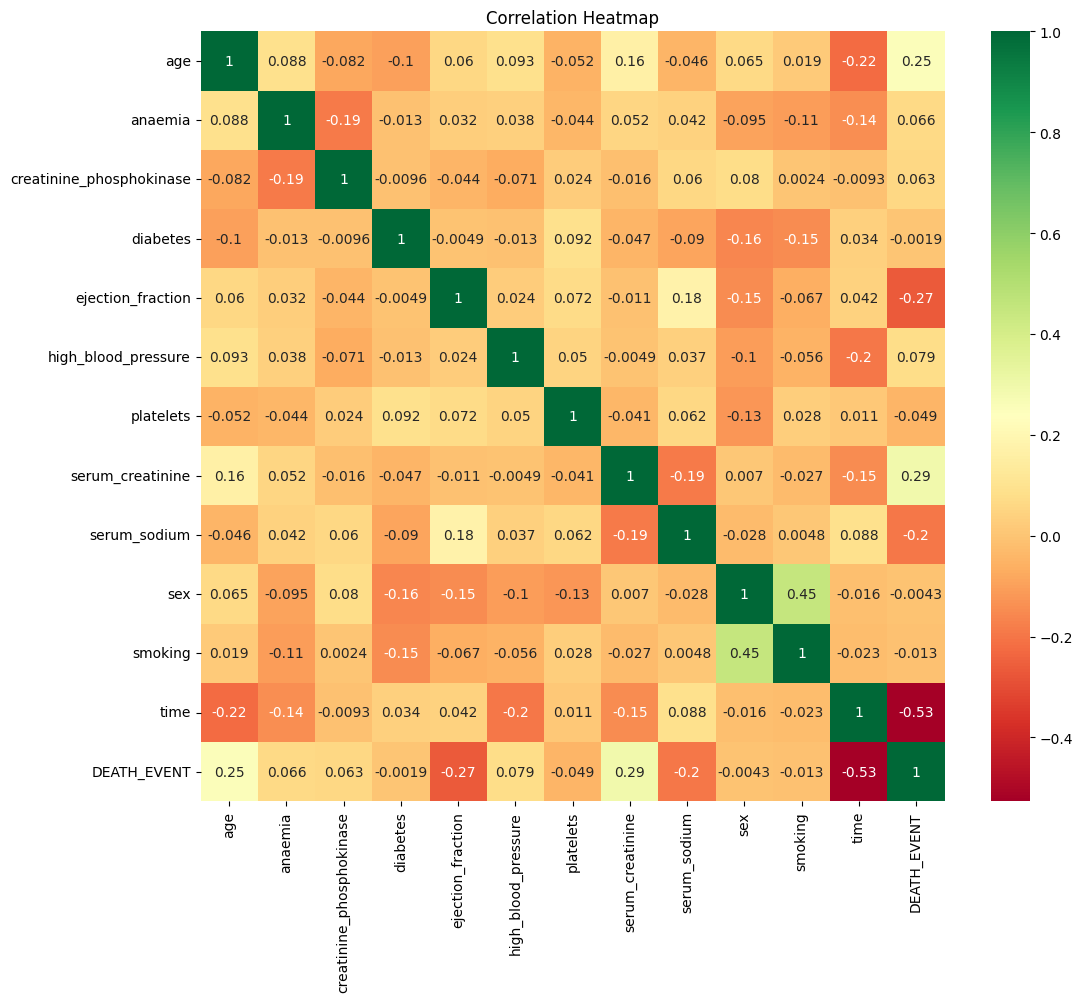

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap");

There is a Negative correlation between time and DEATH_EVENT.

Positive correlation between age and DEATH_EVENT & serum_creatinine and DEATH_EVENT.

Other variables have Neutral correlation with DEATH_EVENT changes doesn't affect to DEATH_EVENT.

# Data Cleaning

## Mengecek duplicate

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikasi

## Mengecek Nulls

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Handling outliers

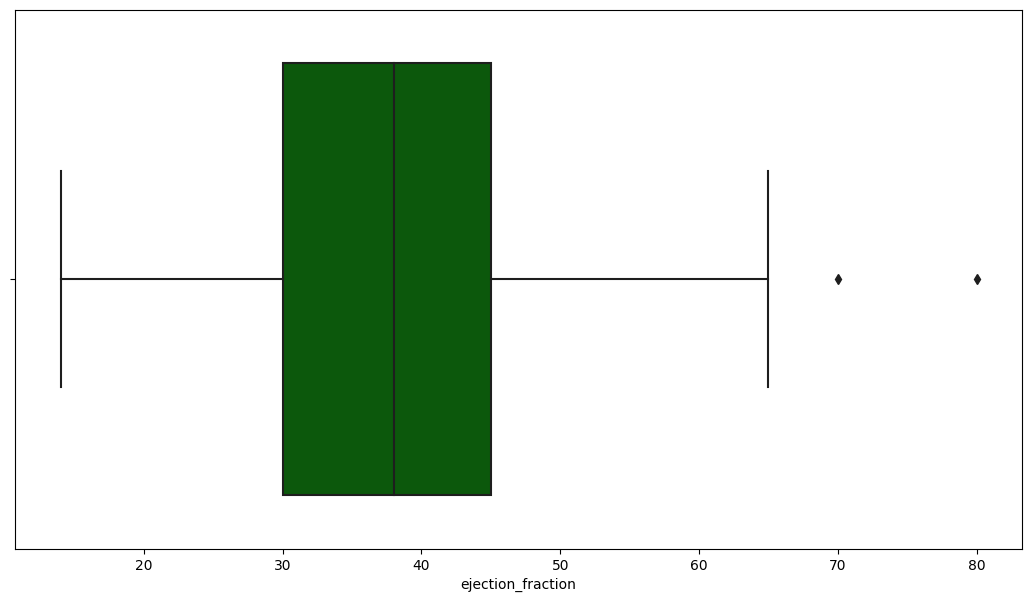

In [ ]:
plt.figure(figsize=(13,7))
sns.boxplot(x = df.ejection_fraction, color = 'darkgreen')
plt.show()

In [ ]:
x=df[df['ejection_fraction']>=65]
x.shape

(3, 13)

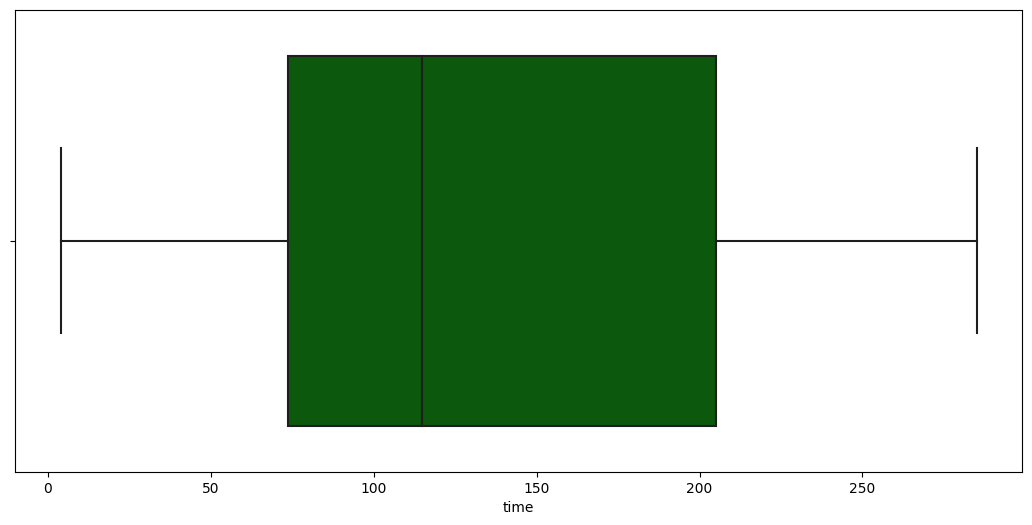

In [ ]:
df=df[df['ejection_fraction']<65]
plt.figure(figsize=(13,6))
sns.boxplot(x=df.time, color = 'darkgreen')
plt.show()

**Tidak terdapat outlier pada waktu**

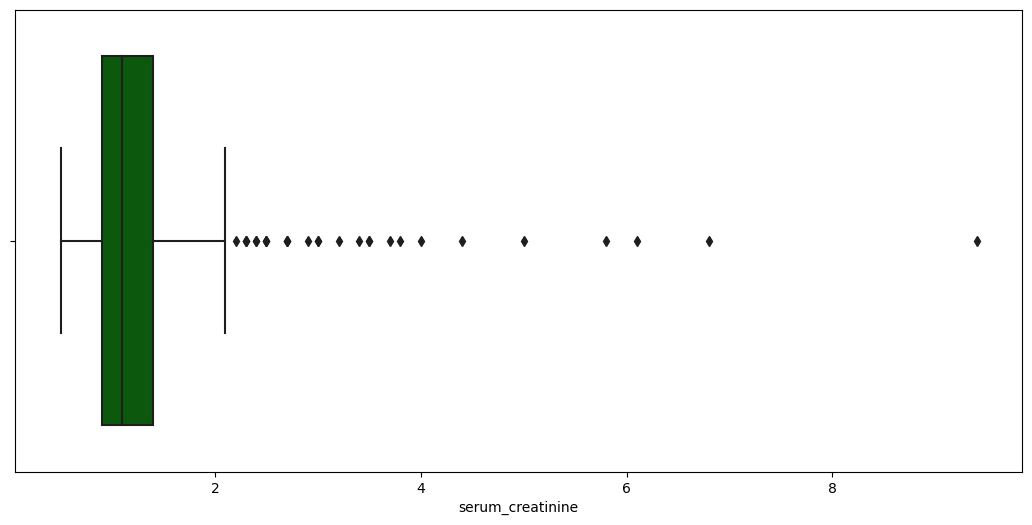

In [ ]:
plt.figure(figsize=(13,6))
sns.boxplot(x=df.serum_creatinine, color = 'darkgreen')
plt.show()

## Splitting data

In [ ]:
x=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xtest.shape)

(222, 12)
(74, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       296 non-null    float64
 1   anaemia                   296 non-null    int64  
 2   creatinine_phosphokinase  296 non-null    int64  
 3   diabetes                  296 non-null    int64  
 4   ejection_fraction         296 non-null    int64  
 5   high_blood_pressure       296 non-null    int64  
 6   platelets                 296 non-null    float64
 7   serum_creatinine          296 non-null    float64
 8   serum_sodium              296 non-null    int64  
 9   sex                       296 non-null    int64  
 10  smoking                   296 non-null    int64  
 11  time                      296 non-null    int64  
 12  DEATH_EVENT               296 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.4 KB


## Scalling data (Preprocessing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(xtrain)

MinMaxScaler()

In [ ]:
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [ ]:
# Creating Function
def predict(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    trainac=model.score(xtrain,ytrain)
    testac=model.score(xtest,ytest)

    print(f"Training Accuracy {trainac}\nTesting Accuracy {testac}")


# MODEL BUILDING

# KNN

In [ ]:
# KNN
model_knn=KNeighborsClassifier(n_neighbors=6)
model_knn.fit(xtrain,ytrain)
ypred_knn=model_knn.predict(xtest)
trainac_knn=model_knn.score(xtrain,ytrain)
testac_knn=model_knn.score(xtest,ytest)
print(f"Triaing Accuracy {trainac_knn}\nTesting Accuracy {testac_knn}")

Triaing Accuracy 0.7723214285714286
Testing Accuracy 0.7733333333333333


In [ ]:
trainac=[]
testac=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)

    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

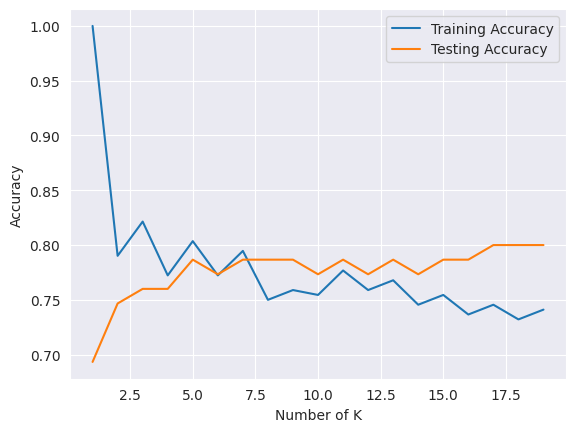

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')

plt.plot(range(1,20), trainac, label='Training Accuracy')
plt.plot(range(1,20), testac, label='Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
# Random Forest Classifier

model_rf=RandomForestClassifier()
model_rf.fit(xtrain,ytrain)
ypred_rf=model_rf.predict(xtest)
trainac_rf=model_rf.score(xtrain,ytrain)
testac_rf=model_rf.score(xtest,ytest)
print(f"Training Accuracy {trainac_rf}\nTesting Accuracy {testac_rf}")

Training Accuracy 1.0
Testing Accuracy 0.9333333333333333


A training accuracy of 1.0 (or 100%) suggests that the model has overfit the training data

# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVC
model_SVC_rbf=SVC(kernel='rbf')
model_SVC_rbf.fit(xtrain,ytrain)
ypred_SVC_rbf=model_SVC_rbf.predict(xtest)
trainac_SVC_rbf=model_SVC_rbf.score(xtrain,ytrain)
testac_SVC_rbf=model_SVC_rbf.score(xtest,ytest)
print(f"Training Accuracy {trainac_SVC_rbf}\nTesting Accuracy {testac_SVC_rbf}")

Training Accuracy 0.8883928571428571
Testing Accuracy 0.88


In [ ]:
model_SVC_poly=SVC(kernel='poly')
model_SVC_poly.fit(xtrain,ytrain)
ypred_SVC_poly=model_SVC_poly.predict(xtest)
trainac_SVC_poly=model_SVC_poly.score(xtrain,ytrain)
testac_SVC_poly=model_SVC_poly.score(xtest,ytest)
print(f"Training Accuracy {trainac_SVC_poly}\nTesting Accuracy {testac_SVC_poly}")

Training Accuracy 0.8616071428571429
Testing Accuracy 0.7866666666666666


In [ ]:
model_SVC_linear=SVC(kernel='linear')
model_SVC_linear.fit(xtrain,ytrain)
ypred_SVC_linear=model_SVC_linear.predict(xtest)
trainac_SVC_linear=model_SVC_linear.score(xtrain,ytrain)
testac_SVC_linear=model_SVC_linear.score(xtest,ytest)
print(f"Training Accuracy {trainac_SVC_linear}\nTesting Accuracy {testac_SVC_linear}")

Training Accuracy 0.8258928571428571
Testing Accuracy 0.8666666666666667


In [ ]:


model_SVC_sigmoid=SVC(kernel='sigmoid')
model_SVC_sigmoid.fit(xtrain,ytrain)
ypred_SVC_sigmoid=model_SVC_sigmoid.predict(xtest)
trainac_SVC_sigmoid=model_SVC_sigmoid.score(xtrain,ytrain)
testac_SVC_sigmoid=model_SVC_sigmoid.score(xtest,ytest)
print(f"Training Accuracy {trainac_SVC_sigmoid}\nTesting Accuracy {testac_SVC_sigmoid}")

Training Accuracy 0.78125
Testing Accuracy 0.8266666666666667


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR=LogisticRegression()
model_LR.fit(xtrain,ytrain)
ypred_LR=model_SVC_sigmoid.predict(xtest)
trainac_LR=model_SVC_sigmoid.score(xtrain,ytrain)
testac_LR=model_SVC_sigmoid.score(xtest,ytest)
print(f"Training Accuracy {trainac_LR}\nTesting Accuracy {testac_LR}")

Training Accuracy 0.78125
Testing Accuracy 0.8266666666666667


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x=xtrain,y=ytrain,validation_split=0.30,epochs=300,batch_size=10)

Epoch 1/300
16/16 [==============================] - 2s 19ms/step - loss: 0.6519 - accuracy: 0.6090 - val_loss: 0.6786 - val_accuracy: 0.6324
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.7179 - val_loss: 0.6355 - val_accuracy: 0.6765
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7821 - val_loss: 0.6076 - val_accuracy: 0.6618
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.8077 - val_loss: 0.5833 - val_accuracy: 0.6912
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5335 - accuracy: 0.8077 - val_loss: 0.5617 - val_accuracy: 0.7206
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.8269 - val_loss: 0.5497 - val_accuracy: 0.7206
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4968 - accuracy: 0.8205 - val_loss: 0.5337 - val_accuracy: 0.7500
Epoch 8/300


In [ ]:
## how well the model is fitting to the data it has already seen during the training process.
scores=model.evaluate(xtrain,ytrain)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.9107
accuracy: 91.07%


In [ ]:
#  how well the model is able to generalize to new, unseen data.
scores=model.evaluate(xtest,ytest)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

3/3 [==============================] - 0s 6ms/step - loss: 0.9537 - accuracy: 0.8000
accuracy: 80.00%


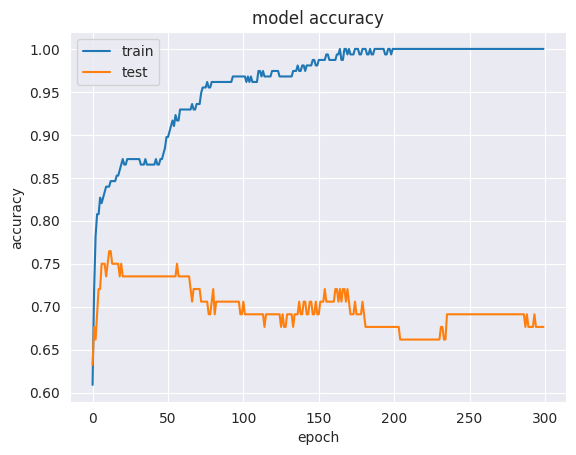

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
Models={"Models":["KNN","Random_Forest_Classifier","SVC_rbf","SVC_Poly","SVC_linear","SVC_sigmoid","Logistic_Regression","ANN"],\
       "Training_Accuracy":[model_knn.score(xtrain,ytrain),model_rf.score(xtrain,ytrain),model_SVC_rbf.score(xtrain,ytrain),model_SVC_poly.score(xtrain,ytrain),model_SVC_linear.score(xtrain,ytrain),model_SVC_sigmoid.score(xtrain,ytrain),model_SVC_sigmoid.score(xtrain,ytrain),model.evaluate(xtrain,ytrain)],\
       "Testing_Accuracy":[model_knn.score(xtest,ytest),model_rf.score(xtest,ytest),model_SVC_rbf.score(xtest,ytest),model_SVC_poly.score(xtest,ytest),model_SVC_linear.score(xtest,ytest),model_SVC_sigmoid.score(xtest,ytest),model_SVC_sigmoid.score(xtest,ytest),model.evaluate(xtest,ytest)]}

Scores=pd.DataFrame(Models)

3/3 [==============================] - 0s 4ms/step - loss: 0.9537 - accuracy: 0.8000


In [ ]:
Scores

,Models,Training_Accuracy,Testing_Accuracy
0,KNN,0.772321,0.773333
1,Random_Forest_Classifier,1.0,0.933333
2,SVC_rbf,0.888393,0.88
3,SVC_Poly,0.861607,0.786667
4,SVC_linear,0.825893,0.866667
5,SVC_sigmoid,0.78125,0.826667
6,Logistic_Regression,0.78125,0.826667
7,ANN,"[0.4853166937828064, 0.9017857313156128]","[0.9537005424499512, 0.800000011920929]"
